In [1]:
import numpy as np
X_train = np.load("reshaped_14.npy")
# X_train1 = X_train[:40000]
np.random.seed(42)

In [2]:
def layer(w,x,b):
    out = np.dot(x,w)+b.T
    return out
# the sigmoid function
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

# derivative of sigmoid function
def derivative_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

In [3]:
flat = X_train[0].shape
print(flat)
epochs = 10
in_dim = flat[0]*flat[1]
X=X_train.reshape(len(X_train),flat[0]*flat[1])
print(X.shape)
# rescaled
X=X/255.0

(14, 14)
(60000, 196)


In [4]:
hidden_nodes=250
learning_rate = 1e-4
Lambda = 1
s1 = 0.05
W1=np.random.normal(0,1,(in_dim,hidden_nodes))
W2=np.random.normal(0,1,(hidden_nodes,in_dim))
print(W2.shape)
b1=np.random.normal(0,1,(hidden_nodes,1))
b2=np.random.normal(0,1,(in_dim,1))
print(b2.shape)
nsamples = len(X)

(250, 196)
(196, 1)


In [5]:
def backprop(delta,z):
    sum1=np.sum(delta,axis=0)
    sum1=sum1.reshape(len(sum1),1)
    bias = sum1
    total = np.matmul(z.T,delta)
    return total,bias

def smi(delta,W,z):
    delta_l1 = np.matmul(delta,W.T)
#     delta_l1 = delta_l1.reshape(len(delta_l1),1)
    sm = derivative_sigmoid(z)*delta_l1
    return sm

In [6]:
epochs=200
for k in range(0,epochs):
    total_1 = np.zeros(W1.shape)
    total_2 = np.zeros(W2.shape)
    bias_1 = np.zeros(b1.shape)
    bias_2 = np.zeros(b2.shape)
    loss = 0
    # forward pass
    out_1 = layer(W1,X,b1)
    z = sigmoid(out_1)
    out_2 = layer(W2,z,b2)
    y_pred= sigmoid(out_2)
    
    zm = np.mean(z,axis=0)
    zm=zm.reshape(1,len(zm))
    D = -s1/zm + (1-s1)/(1-zm)
    
    delta = 2*(y_pred-X)*derivative_sigmoid(out_2)
    tot,bia = backprop(delta,z)
    bias_2=bias_2+bia
    total_2 = total_2 + tot
    
    der_layer1 = derivative_sigmoid(out_1)
    term = Lambda*D*der_layer1
    
    
    sm = smi(delta,W2,out_1)
    sm = sm + term
    
    tot,bia = backprop(sm,X)
    bias_1 = bias_1+bia
    total_1=total_1+tot 
    
    loss = np.sum((np.linalg.norm(y_pred-X))**2)
    print((loss,k))
    
    b2=b2-learning_rate*bias_2
    b1=b1-learning_rate*bias_1
    W2=W2-learning_rate*total_2
    W1=W1-learning_rate*total_1

(5195425.78954407, 0)
(2523655.6762291742, 1)
(1377200.1887236158, 2)
(1130930.147408648, 3)
(1019227.2229449205, 4)
(900553.5256282198, 5)
(819973.7650455814, 6)
(805524.8684840689, 7)
(763156.7830748295, 8)
(743445.9871188699, 9)
(715452.3868422982, 10)
(700801.2743875327, 11)
(677194.5691569949, 12)
(665414.5169539254, 13)
(644478.8281344186, 14)
(634456.0637857575, 15)
(615626.765174445, 16)
(606531.3982025343, 17)
(589748.876920898, 18)
(581066.4910569413, 19)
(566267.723274543, 20)
(558008.0070864657, 21)
(544959.0396892929, 22)
(537199.5036891804, 23)
(525623.684003045, 24)
(518385.9889726015, 25)
(508050.11018062907, 26)
(501329.162156278, 27)
(492039.79207903106, 28)
(485812.33336521685, 29)
(477412.0831018406, 30)
(471642.84359006514, 31)
(464005.71179743006, 32)
(458653.52774092066, 33)
(451676.66535964864, 34)
(446697.1700633862, 35)
(440293.6687814219, 36)
(435641.64666468, 37)
(429736.5382018481, 38)
(425369.03865684406, 39)
(419898.02975612314, 40)
(415777.8109680203, 41

KeyboardInterrupt: 

In [28]:
out_1 = layer(W1,X_train[9].reshape(1,196)/255.0,b1)
z = sigmoid(out_1)
out_2 = layer(W2,z,b2)
y_pred= sigmoid(out_2)

In [29]:
print(np.min(z))

1.7332945727007997e-11


In [30]:
import matplotlib.pyplot as plt
print(np.max(y_pred))

0.9936516130164038


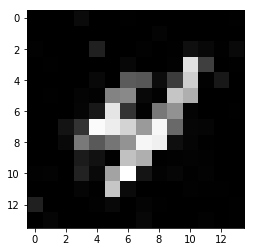

In [31]:
y_pred = y_pred.reshape(14,14)
y_pred=y_pred*255
plt.imshow(y_pred,cmap='gray')
plt.show()

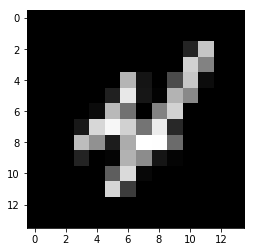

In [32]:
plt.imshow(X_train[9],cmap='gray')
plt.show()

In [33]:
print(np.mean(z))

0.05073451238136953
